## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [1]:
import pandas as pd
data = pd.read_csv('nc (1).csv')

In [2]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

### Question 1

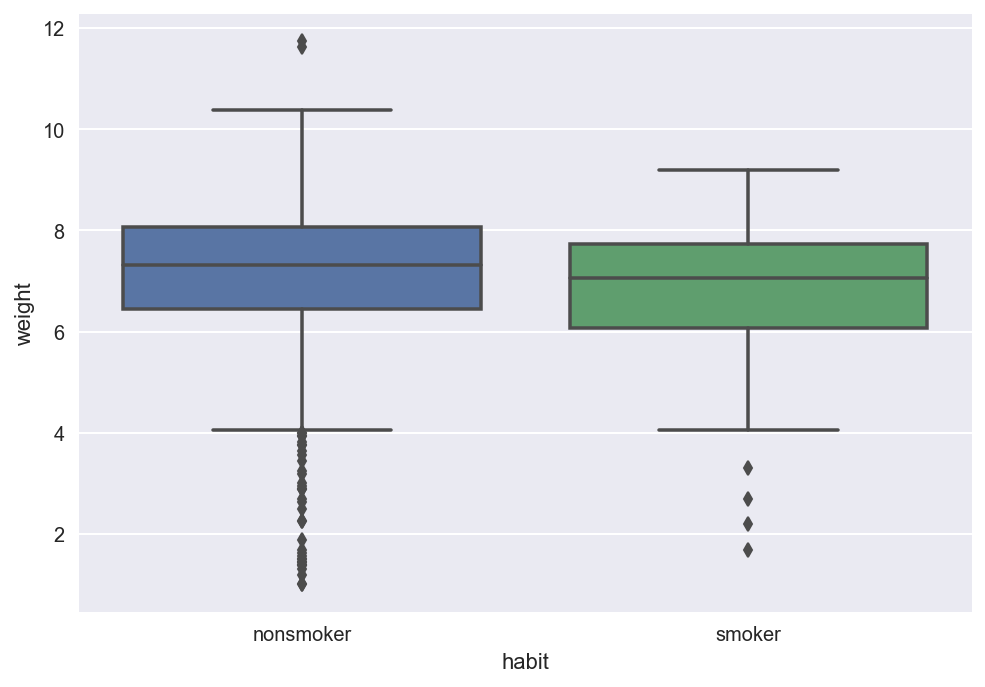

In [4]:
boxplot = sns.boxplot(x='habit', y='weight', data=data)

The distribution of both Smokers and Non Smokers are quite close due to the interquartile range nearly overlaps
and the median line are quite close to each other but this cannot be guaranteed as the statisfical significance 
of equality is needed to be tested using the t-test or z-test

### Question 2

#### Research Question

Is there a significant difference between the population average of average weights of babies born to smoking and non-smoking mothers
  
**Population**: States of North Carolina on recorded births.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Babies weights.  

**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$


### Question 3

In [10]:
avg_of_young_mom = data['gained'][data['mature'] == 'younger mom'].mean()
std_of_young_mom = data['gained'][data['mature'] == 'younger mom'].std()
avg_of_mature_mom = data['gained'][data['mature'] == 'mature mom'].mean()
std_of_young_mom = data['gained'][data['mature'] == 'mature mom'].std()

In [6]:
young_mom = data['gained'][data['mature'] == 'younger mom']
mature_mom = data['gained'][data['mature'] == 'mature mom']

In [7]:
sm.stats.ztest(young_mom.dropna(), mature_mom.dropna() ,alternative='two-sided')

(1.3150120052394427, 0.18850586777828726)

we reject the null hypothesis that the average weigths are the same due to the p-value (0.1885) is greater than
0.05, therefore we fail to fail to reject the Alternative Hypothesis that the average are different

In [9]:
data['habit'].unique()

array(['nonsmoker', 'smoker', nan], dtype=object)

### Question 4

In [14]:
avg_of_nonsmoker = data['weight'][data['habit'] == 'nonsmoker'].mean()
avg_of_smoker = data['weight'][data['habit'] == 'smoker'].mean()

lower_nonsmoker = np.percentile(avg_of_nonsmoker , 2.5)
upper_nonsmoker = np.percentile(avg_of_nonsmoker, 97.5)

In [15]:
lower_smoker = np.percentile(avg_of_smoker , 2.5)
upper_smoker = np.percentile(avg_of_smoker, 97.5)